In [1]:
# load Providentia interactive class
from providentia import Interactive

In [2]:
# magic to make plots appear inline
%matplotlib inline

In [3]:
# read and filter data from .conf 
provi = Interactive(conf='foci_aeronet_lev1_5.conf')

Reading data
SELECTED SPECIES
- Main network-species ['AERONET_v3_lev2.0|absae440-675aero', 'AERONET_v3_lev2.0|absae675-870aero', 'AERONET_v3_lev2.0|lsae440-675aero', 'AERONET_v3_lev2.0|abswdaeaero', 'AERONET_v3_lev2.0|absod440bc', 'AERONET_v3_lev2.0|absae440-870bc', 'AERONET_v3_lev2.0|absod440brc']
Resetting filter
Filtering data


In [4]:
# print .conf
provi.print_config()

[All]
network = AERONET_v3_lev2.0
species = absae440-675aero, absae675-870aero, lsae440-675aero, abswdaeaero, absod440bc, absae440-870bc, absod440brc
resolution = monthly
start_date = 20180101
end_date = 20190101
temporal_colocation = True
spatial_colocation = True


In [5]:
# get data in memory (in netCDF format)
data = provi.get_data(format='nc')
#aae1 = data['AERONET_v3_lev1.5|absae440-675aero_data'][:].flatten()
#aae2 = data['AERONET_v3_lev1.5|absae675-870aero_data'][:].flatten()
#sae1 = data['AERONET_v3_lev1.5|lsae440-675aero_data'][:].flatten()
#wda = data['AERONET_v3_lev1.5|abswdaeaero_data'][:].flatten()
#aae2_bc = data['AERONET_v3_lev1.5|absae440-870bc_data'][:].flatten()
#aodbc440 = data['AERONET_v3_lev1.5|absod440bc_data'][:].flatten()
#aodbrc440 = data['AERONET_v3_lev1.5|absod440brc_data'][:].flatten()
aae1 = data['AERONET_v3_lev2.0|absae440-675aero_data'][:].flatten()
aae2 = data['AERONET_v3_lev2.0|absae675-870aero_data'][:].flatten()
sae1 = data['AERONET_v3_lev2.0|lsae440-675aero_data'][:].flatten()
wda = data['AERONET_v3_lev2.0|abswdaeaero_data'][:].flatten()
aae2_bc = data['AERONET_v3_lev2.0|absae440-870bc_data'][:].flatten()
aodbc440 = data['AERONET_v3_lev2.0|absod440bc_data'][:].flatten()
aodbrc440 = data['AERONET_v3_lev2.0|absod440brc_data'][:].flatten()

In [6]:
# set colours for speciation
import numpy as np
colours = np.array(['#808080']*len(aae2))
dust_indices = (sae1 < 0.5) & (aae1 > 1.5)
carbonaceous_indices = (sae1 > 1.2)
bc_indices = (aae1 < 0.55) & (aae2 < 0.83)
colours[dust_indices] = '#FFA500'
colours[carbonaceous_indices] = '#964B00'
colours[bc_indices] = '#000000'
mixed_indices = np.where(colours == '#808080')[0]

aae2[dust_indices] = np.NaN
aae2[mixed_indices] = np.NaN
wda[dust_indices] = np.NaN
wda[mixed_indices] = np.NaN


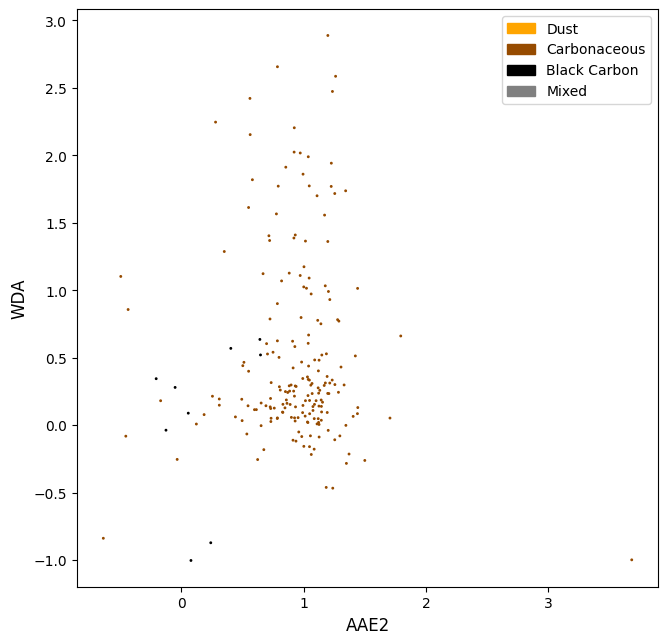

In [7]:
# plot aae2 vs wda
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig = plt.figure(figsize=[7.5, 7.5])
ax = fig.add_subplot(111)
ax.scatter(aae2, wda, c=colours, s=1.1, marker='o')
ax.set_xlabel('AAE2', fontsize=12)
ax.set_ylabel('WDA', fontsize=12)

# make legend
dust_label = mpatches.Patch(color='#FFA500', label='Dust')
carbonaceous_label= mpatches.Patch(color='#964B00', label='Carbonaceous')
bc_label = mpatches.Patch(color='#000000', label='Black Carbon')
mixed_label = mpatches.Patch(color='#808080', label='Mixed')
handles = [dust_label, carbonaceous_label, bc_label, mixed_label]
ax.legend(handles=handles, loc='upper right')

# show plot
plt.show()
plt.close()

In [8]:
aae2.shape


(2532,)

In [9]:
wda.shape

(2532,)